In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, BatchNormalization,Activation,Dropout


### 1. Load the dataset  (CIFAR10)

In [2]:
# X refer to images
# y refers to labels

(X_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [3]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [4]:
# check the dataset
print('The traing image size:' , x_train.shape)
print('The traing lable size:' , y_train.shape)

print('\nThe validation image size:' , x_val.shape)
print('The validation lable size:' , y_val.shape)

print('\nThe testing image size:' , x_test.shape)
print('The testing lable size:' , y_test.shape)


The traing image size: (35000, 32, 32, 3)
The traing lable size: (35000, 1)

The validation image size: (15000, 32, 32, 3)
The validation lable size: (15000, 1)

The testing image size: (10000, 32, 32, 3)
The testing lable size: (10000, 1)


In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(32, 32, 3)
The label of X1: deer


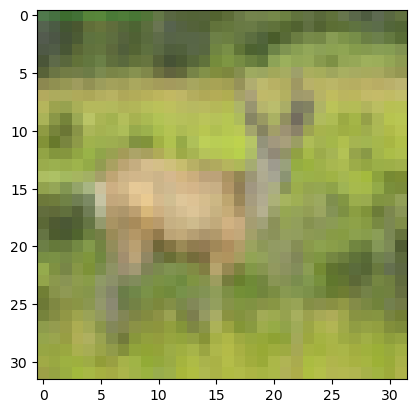

In [7]:
# visualize one image of training dataset and it correspoind label
from matplotlib import pyplot as plt
i = 50
X1= x_train[i]
print (X1.shape)

plt.imshow(X1)
y1= y_train[i]

print ("The label of X1:",classes[int(y1)] )

### 2. Create Model Architecture

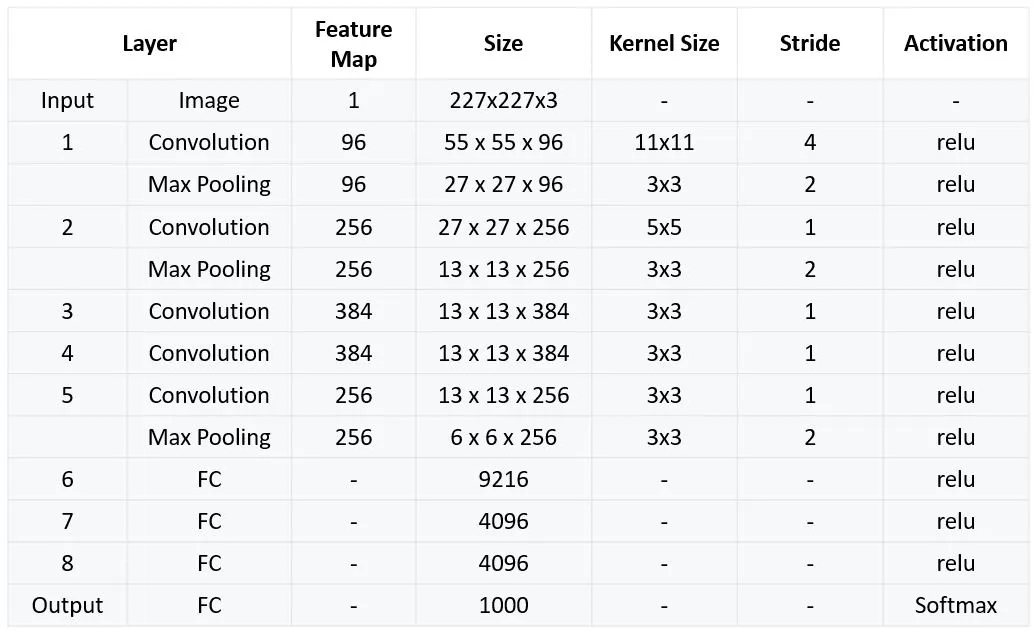

In [7]:
## Alexnet for CIFAR10
## put into a funciton 

def create_model():
    # creating alexnet model
    model = Sequential(name="AlexNet_CIFAR10")

    #1st convolution layer 
    model.add(Conv2D(input_shape= (32,32,3),kernel_size=(11,11),filters=96,strides=4,activation='relu'))
    # maxpool1
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))


    #2nd convolution layer 
    model.add(Conv2D(kernel_size=(5,5),filters=256,strides=1,padding='same',activation='relu'))
    # maxpool2
    model.add(MaxPooling2D(pool_size=(3,3),strides=2))


    #3rd convolution layer 
    model.add(Conv2D(kernel_size=(3,3),filters=384,strides=1,padding='same',activation='relu'))

    #4th convolution layer 
    model.add(Conv2D(kernel_size=(3,3),filters=384,strides=1,padding='same',activation='relu'))

    #5th convolution layer 
    model.add(Conv2D(kernel_size=(3,3),filters=256,strides=1,padding='same',activation='relu'))
    # maxpool3 
    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
    model.add(Dropout(0.5))

    # flatten
    model.add(Flatten())

    # 1st Fully Connected Layer
    model.add(Dense(4096,activation='relu'))


    #2nd Fully Connected Layer
    model.add(Dense(4096, activation='relu'))

    # final output layer
    model.add(Dense(10))  # CIFAR 10 dataset has 10 output classes
    model.add(Activation('softmax'))

    # Compiling the model
    model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
    return model


In [9]:
## create a model using the function 
model1 = create_model()
model1.summary()

Model: "AlexNet_CIFAR10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 256)     

### Prepare Data and Labels to train the model

In [10]:
#check the shape of images and lables before chaning

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

#Onehot Encoding the labels 
from tensorflow.keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

print('Training Labels', y_train.shape)
print('Validation Labels',y_val.shape)
print('Testing Labels',y_test.shape)


Training Labels (35000, 10)
Validation Labels (15000, 10)
Testing Labels (10000, 10)


### Checkpoint Deep Learning Models

Deep learning models can take hours, days, or even weeks to train. If the run is stopped unexpectedly, you can lose a lot of work.

When training deep learning models, the checkpoint is at the weights of the model. These weights can be used to make predictions as is or as the basis for ongoing training.

#### Make a directory/folder to save the checkpoints.

In [11]:
import os
checkpoint_path = "training_1/cp.ckpt"

#### Create a model checkpoint and train the model

In [12]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)
# verbose: 'auto', 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.


epochs= 3
batch_size = 32

# Training the model (model1)
model1.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), 
          epochs = epochs,
          steps_per_epoch = x_train.shape[0]//batch_size,
          validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size),
          validation_steps = x_val.shape[0]//batch_size,
          callbacks = [cp_callback,lr])



Epoch 1/3
1093/1093 [==============================] - 674s 614ms/step - loss: 2.3101 - accuracy: 0.0972 - val_loss: 2.3029 - val_accuracy: 0.0968
Epoch 2/3
1093/1093 [==============================] - 745s 682ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3029 - val_accuracy: 0.0969
Epoch 3/3
1093/1093 [==============================] - 699s 639ms/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.0996


This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch:

In [16]:
os.listdir('training_1')

['checkpoint', 'cp.ckp', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

### Now we will create a new model using create_model() function and try can we use it without traiing. 

In [22]:
model_untrained = create_model()
# Evaluate the model
loss, acc = model_untrained.evaluate(x_test, y_test, verbose=2)
print("Untrained model2, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 6s - loss: 2.3075 - accuracy: 0.0986
Untrained model2, accuracy:  9.86%


Let's copy the weights of the trined model. We will load the weights from the checkpoint and re-evaluate model2:

In [24]:
# Loads the weights
model_untrained.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model2.evaluate(x_test, y_test, verbose=2)
print("Restored model_untrained with trained weights of model1, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 6s - loss: 2.3026 - accuracy: 0.1000
Restored model_untrained with trained weights of model1, accuracy: 10.00%


#### Save checkpoints once every five epochs (Using save_freq) 
Previous example creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch:

In [26]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size) 

# Create a new model instance
model2 = create_model()

# Save the weights using the `checkpoint_path` format
model2.save_weights(checkpoint_path.format(epoch=0))


epochs = 10
batch_size = 32

# Training the model2 and save its weight in every 5 epoches 
history = model2.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), 
          epochs = epochs,
          steps_per_epoch = x_train.shape[0]//batch_size,
          validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size),
          validation_steps = x_val.shape[0]//batch_size,
          callbacks = [cp_callback])


Epoch 1/10
 160/1093 [===>..........................] - ETA: 3:49 - loss: 2.3508 - accuracy: 0.0982
Epoch 00001: saving model to training_2\cp-0001.ckpt
 320/1093 [=======>......................] - ETA: 3:18 - loss: 2.3268 - accuracy: 0.0965
Epoch 00001: saving model to training_2\cp-0001.ckpt
 480/1093 [============>.................] - ETA: 2:44 - loss: 2.3188 - accuracy: 0.0967
Epoch 00001: saving model to training_2\cp-0001.ckpt
 640/1093 [================>.............] - ETA: 2:09 - loss: 2.3147 - accuracy: 0.0967
Epoch 00001: saving model to training_2\cp-0001.ckpt
 800/1093 [====================>.........] - ETA: 1:35 - loss: 2.3123 - accuracy: 0.0970
Epoch 00001: saving model to training_2\cp-0001.ckpt
 960/1093 [=========================>....] - ETA: 44s - loss: 2.3107 - accuracy: 0.0982
Epoch 00001: saving model to training_2\cp-0001.ckpt
1093/1093 [==============================] - 380s 347ms/step - loss: 2.3098 - accuracy: 0.0978 - val_loss: 2.3030 - val_accuracy: 0.0962
E

In [5]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest 

'training_2\\cp-0010.ckpt'

In [6]:
best = 'training_2\\cp-0010.ckpt'
best

'training_2\\cp-0010.ckpt'

### Now we will create a new model and try to load the weights from checkpoints

In [9]:
model_untrained_2= create_model()
# Evaluate the model
loss, acc = model_untrained_2.evaluate(x_test, y_test, verbose=2)
print("Untrained model2, accuracy: {:5.2f}%".format(100 * acc))


# Load the previously saved weights
model_untrained_2.load_weights(latest)
# Re-evaluate the model
loss, acc = model_untrained_2.evaluate(x_test, y_test, verbose=2)
print("Restored model using latest weights, accuracy: {:5.2f}%".format(100 * acc))


# Load the previously saved weights
model_untrained_2.load_weights(best)
# Re-evaluate the model
loss, acc = model_untrained_2.evaluate(x_test, y_test, verbose=2)
print("Restored model using best weights, accuracy: {:5.2f}%".format(100 * acc))

NameError: name 'x_test' is not defined

### Save checkpoints with best performance (using save_best_only: weights/model)

In [ ]:
# Include the epoch in the file name (uses `str.format`)
#checkpoint_path = "training_3/cp-{epoch:04d}.ckpt"
checkpoint_path ="training_3/weights.best.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=0, 
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only = True) 

# Create a new model instance
model3 = create_model()


# Training the model2 and save its weight in every 5 epoches 
history = model3.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), 
          epochs = epochs,
          steps_per_epoch = x_train.shape[0]//batch_size,
          validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size),
          validation_steps = x_val.shape[0]//batch_size,
          callbacks = [cp_callback])


Epoch 1/10
1060/1093 [============================>.] - ETA: 15s - loss: 2.3070 - accuracy: 0.0977